In [1]:
# image thinning - morphological image processing
# learning resource - https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm
import numpy  as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

'''
(A ^ B) - binary image complement operation
(A & B) - binary image intersection
(A | B) - binary image union
(A & (B ^ 1)) - binary image set difference
'''

'\n(A ^ B) - binary image complement operation\n(A & B) - binary image intersection\n(A | B) - binary image union\n(A & (B ^ 1)) - binary image set difference\n'

Text(0.5, 1.0, 'Complemented Binary Image')

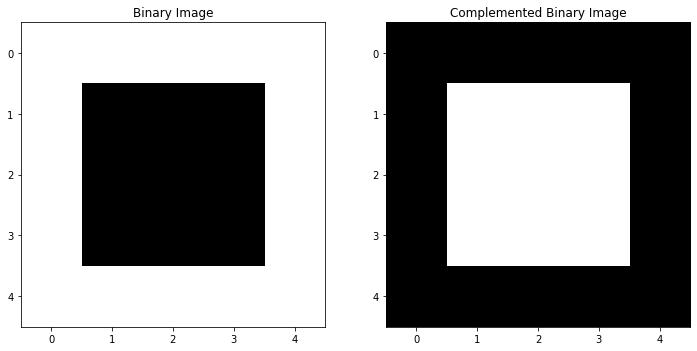

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)
# binary image initialization
binary_image = np.array([[0, 0, 0, 0, 0],
                         [0, 1, 1, 1, 0],
                         [0, 1, 1, 1, 0],
                         [0, 1, 1, 1, 0],
                         [0, 0, 0, 0, 0]], dtype= np.int32)

# binary image show
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap = "binary")
plt.title("Binary Image")

# compelemented binary image
complemented_binary_image = (binary_image ^ 1)

# complemented binary image show
plt.subplot(1, 2, 2)
plt.imshow(complemented_binary_image, cmap = "binary")
plt.title("Complemented Binary Image")

Text(0.5, 1.0, 'Preliminary Thinned Image- 1')

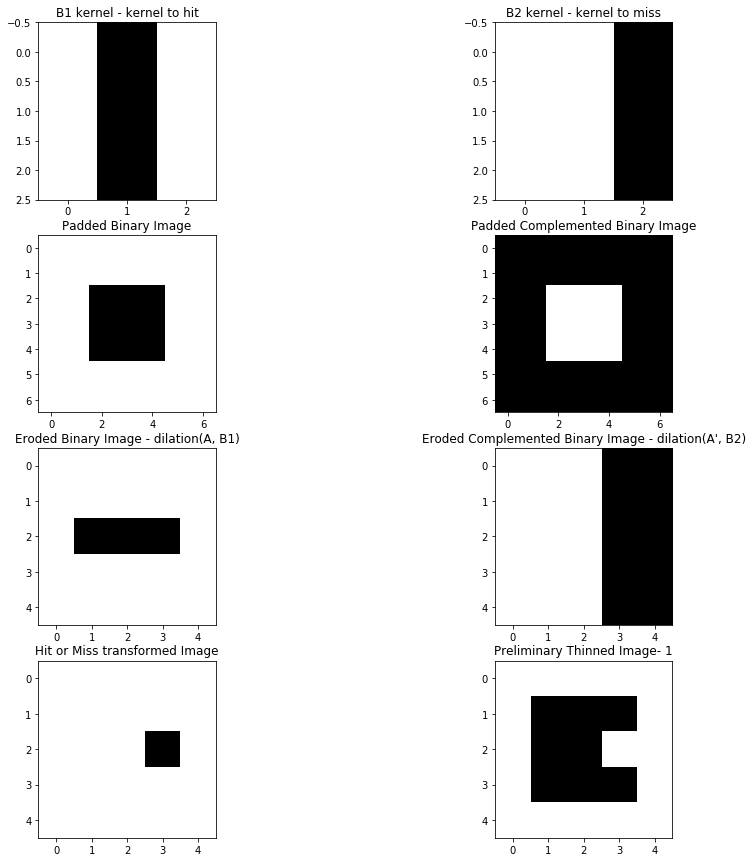

In [3]:
plt.rcParams["figure.figsize"] = (15, 15)
# 3 x 3 B1 kernel initialization - kernel to hit
B1 = np.array([[0, 1, 0],\
               [0, 1, 0],\
               [0, 1, 0]], dtype = np.int32)

# B1 kernel show
plt.subplot(4, 2, 1)
plt.imshow(B1, cmap = "binary")
plt.title("B1 kernel - kernel to hit")



# 3 x 3 B2 kernel initialization - kernel to miss
B2 = np.array([[0, 0, 1],\
               [0, 0, 1],\
               [0, 0, 1]], dtype = np.int32)
# B2 kernel show
plt.subplot(4, 2, 2)
plt.imshow(B2, cmap = "binary")
plt.title("B2 kernel - kernel to miss")



# padded binary image
row, col = binary_image.shape
padded_binary_image = np.zeros((row + 2, col + 2), dtype = np.int32)
padded_binary_image[1 : -1, 1 : -1] = binary_image[:, :].copy()

# padded original binary image show
plt.subplot(4, 2, 3)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")



# padded complemented binary image
padded_complemented_binary_image = padded_binary_image ^ 1

# padded complemented binary image show
plt.subplot(4, 2, 4)
plt.imshow(padded_complemented_binary_image, cmap = "binary")
plt.title("Padded Complemented Binary Image")



# erosion(binary_image, B1) - morphological image processing
row, col      = binary_image.shape
eroded_binary_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 1, 2])
        tmp_col = np.array([1, 1, 1])
        if np.sum(padded_binary_image[i+tmp_row, j+tmp_col] == B1[tmp_row, tmp_col])\
                  == np.sum(B1):
            eroded_binary_image[i, j] = 1
        else:
            eroded_binary_image[i, j] = 0
            
# eroded binary image show dilation(A, B1)
plt.subplot(4, 2, 5)
plt.imshow(eroded_binary_image, cmap = "binary")
plt.title("Eroded Binary Image - dilation(A, B1)")



# erosion(complemented_binary_image, B2) - morphological image processing
row, col      = binary_image.shape
eroded_complemented_binary_image = complemented_binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 1, 2])
        tmp_col = np.array([2, 2, 2])
        if np.sum(padded_complemented_binary_image[i+tmp_row, j+tmp_col]==B2[tmp_row, tmp_col])\
        == np.sum(B2):
            eroded_complemented_binary_image[i, j] = 1
        else:
            eroded_complemented_binary_image[i, j] = 0
            
# eroded complemented binary image show - dilation(A', B2)
plt.subplot(4, 2, 6)
plt.imshow(eroded_complemented_binary_image, cmap = "binary")
plt.title("Eroded Complemented Binary Image - dilation(A', B2)")



# hit or miss transformation - morphological image processing
# intersection(dilated_binary_image, dilated_complemented_binary_image)
hit_miss_image = (eroded_binary_image & eroded_complemented_binary_image)

# Hit or Miss transformed image show
plt.subplot(4, 2, 7)
plt.imshow(hit_miss_image, cmap = "binary")
plt.title("Hit or Miss transformed Image")



# thinned image
thinned_image = (binary_image & (hit_miss_image ^ 1))

# thinned image show
plt.subplot(4, 2, 8)
plt.imshow(thinned_image, cmap = "binary")
plt.title("Preliminary Thinned Image- 1")

Text(0.5, 1.0, 'Preliminary Thinned Image- 2')

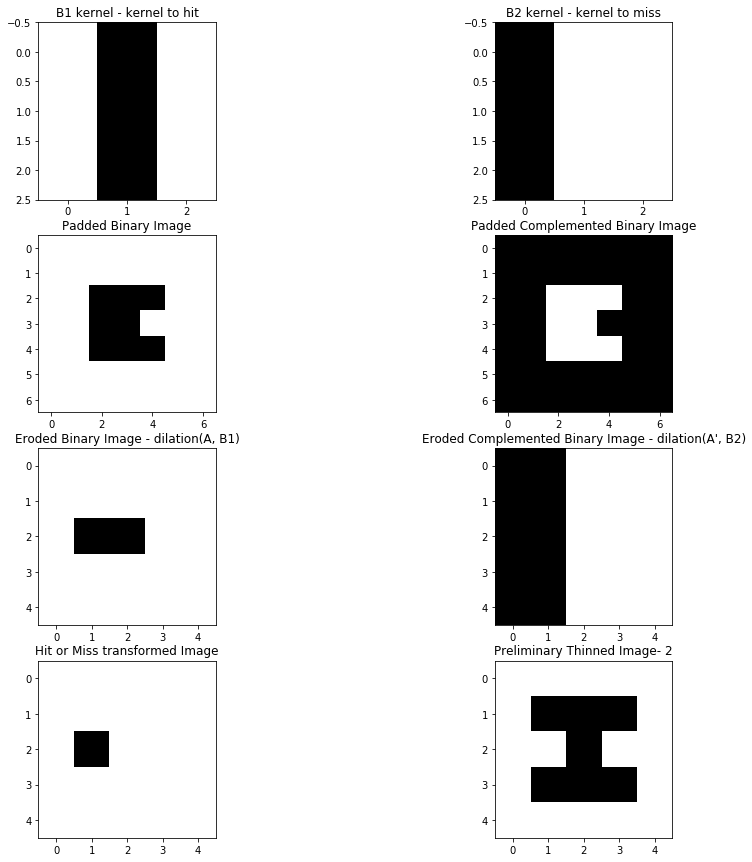

In [4]:
plt.rcParams["figure.figsize"] = (15, 15)
# 3 x 3 B1 kernel initialization - kernel to hit
B1 = np.array([[0, 1, 0],\
               [0, 1, 0],\
               [0, 1, 0]], dtype = np.int32)

# B1 kernel show
plt.subplot(4, 2, 1)
plt.imshow(B1, cmap = "binary")
plt.title("B1 kernel - kernel to hit")



# 3 x 3 B2 kernel initialization - kernel to miss
B2 = np.array([[1, 0, 0],\
               [1, 0, 0],\
               [1, 0, 0]], dtype = np.int32)
# B2 kernel show
plt.subplot(4, 2, 2)
plt.imshow(B2, cmap = "binary")
plt.title("B2 kernel - kernel to miss")



# padded binary image
row, col = binary_image.shape
padded_binary_image = np.zeros((row + 2, col + 2), dtype = np.int32)
padded_binary_image[1 : -1, 1 : -1] = thinned_image[:, :].copy()

# padded original binary image show
plt.subplot(4, 2, 3)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")



# padded complemented binary image
padded_complemented_binary_image = padded_binary_image ^ 1

# padded complemented binary image show
plt.subplot(4, 2, 4)
plt.imshow(padded_complemented_binary_image, cmap = "binary")
plt.title("Padded Complemented Binary Image")



# erosion(binary_image, B1) - morphological image processing
row, col      = binary_image.shape
eroded_binary_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 1, 2])
        tmp_col = np.array([1, 1, 1])
        if np.sum(padded_binary_image[i+tmp_row, j+tmp_col] == B1[tmp_row, tmp_col])\
                  == np.sum(B1):
            eroded_binary_image[i, j] = 1
        else:
            eroded_binary_image[i, j] = 0
            
# eroded binary image show dilation(A, B1)
plt.subplot(4, 2, 5)
plt.imshow(eroded_binary_image, cmap = "binary")
plt.title("Eroded Binary Image - dilation(A, B1)")



# erosion(complemented_binary_image, B2) - morphological image processing
row, col      = binary_image.shape
eroded_complemented_binary_image = complemented_binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 1, 2])
        tmp_col = np.array([0, 0, 0])
        if np.sum(padded_complemented_binary_image[i+tmp_row, j+tmp_col]==B2[tmp_row, tmp_col])\
        == np.sum(B2):
            eroded_complemented_binary_image[i, j] = 1
        else:
            eroded_complemented_binary_image[i, j] = 0
            
# eroded complemented binary image show - dilation(A', B2)
plt.subplot(4, 2, 6)
plt.imshow(eroded_complemented_binary_image, cmap = "binary")
plt.title("Eroded Complemented Binary Image - dilation(A', B2)")



# hit or miss transformation - morphological image processing
# intersection(dilated_binary_image, dilated_complemented_binary_image)
hit_miss_image = (eroded_binary_image & eroded_complemented_binary_image)

# Hit or Miss transformed image show
plt.subplot(4, 2, 7)
plt.imshow(hit_miss_image, cmap = "binary")
plt.title("Hit or Miss transformed Image")



# thinned image
thinned_image = (thinned_image & (hit_miss_image ^ 1))

# thinned image show
plt.subplot(4, 2, 8)
plt.imshow(thinned_image, cmap = "binary")
plt.title("Preliminary Thinned Image- 2")

Text(0.5, 1.0, 'Preliminary Thinned Image- 3')

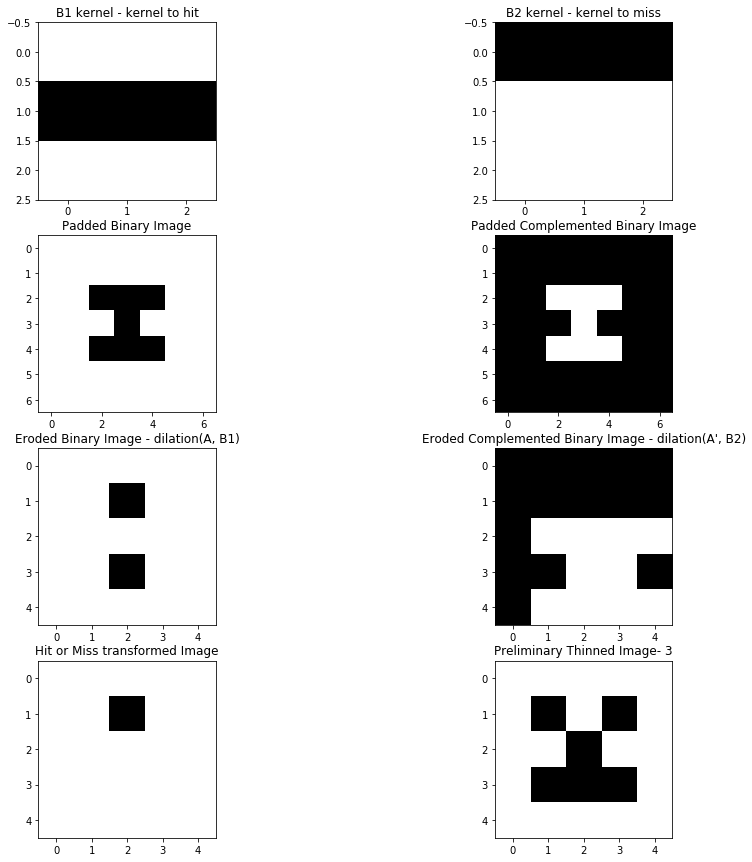

In [5]:
plt.rcParams["figure.figsize"] = (15, 15)
# 3 x 3 B1 kernel initialization - kernel to hit
B1 = np.array([[0, 0, 0],\
               [1, 1, 1],\
               [0, 0, 0]], dtype = np.int32)

# B1 kernel show
plt.subplot(4, 2, 1)
plt.imshow(B1, cmap = "binary")
plt.title("B1 kernel - kernel to hit")



# 3 x 3 B2 kernel initialization - kernel to miss
B2 = np.array([[1, 1, 1],\
               [0, 0, 0],\
               [0, 0, 0]], dtype = np.int32)
# B2 kernel show
plt.subplot(4, 2, 2)
plt.imshow(B2, cmap = "binary")
plt.title("B2 kernel - kernel to miss")



# padded binary image
row, col = binary_image.shape
padded_binary_image = np.zeros((row + 2, col + 2), dtype = np.int32)
padded_binary_image[1 : -1, 1 : -1] = thinned_image[:, :].copy()

# padded original binary image show
plt.subplot(4, 2, 3)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")



# padded complemented binary image
padded_complemented_binary_image = padded_binary_image ^ 1

# padded complemented binary image show
plt.subplot(4, 2, 4)
plt.imshow(padded_complemented_binary_image, cmap = "binary")
plt.title("Padded Complemented Binary Image")



# erosion(binary_image, B1) - morphological image processing
row, col      = binary_image.shape
eroded_binary_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([1, 1, 1])
        tmp_col = np.array([0, 1, 2])
        if np.sum(padded_binary_image[i+tmp_row, j+tmp_col] == B1[tmp_row, tmp_col])\
                  == np.sum(B1):
            eroded_binary_image[i, j] = 1
        else:
            eroded_binary_image[i, j] = 0
            
# eroded binary image show dilation(A, B1)
plt.subplot(4, 2, 5)
plt.imshow(eroded_binary_image, cmap = "binary")
plt.title("Eroded Binary Image - dilation(A, B1)")



# erosion(complemented_binary_image, B2) - morphological image processing
row, col      = binary_image.shape
eroded_complemented_binary_image = complemented_binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 0, 0])
        tmp_col = np.array([0, 1, 1])
        if np.sum(padded_complemented_binary_image[i+tmp_row, j+tmp_col]==B2[tmp_row, tmp_col])\
        == np.sum(B2):
            eroded_complemented_binary_image[i, j] = 1
        else:
            eroded_complemented_binary_image[i, j] = 0
            
# eroded complemented binary image show - dilation(A', B2)
plt.subplot(4, 2, 6)
plt.imshow(eroded_complemented_binary_image, cmap = "binary")
plt.title("Eroded Complemented Binary Image - dilation(A', B2)")



# hit or miss transformation - morphological image processing
# intersection(dilated_binary_image, dilated_complemented_binary_image)
hit_miss_image = (eroded_binary_image & eroded_complemented_binary_image)

# Hit or Miss transformed image show
plt.subplot(4, 2, 7)
plt.imshow(hit_miss_image, cmap = "binary")
plt.title("Hit or Miss transformed Image")



# thinned image
thinned_image = (thinned_image & (hit_miss_image ^ 1))

# thinned image show
plt.subplot(4, 2, 8)
plt.imshow(thinned_image, cmap = "binary")
plt.title("Preliminary Thinned Image- 3")

Text(0.5, 1.0, 'Preliminary Thinned Image- 4')

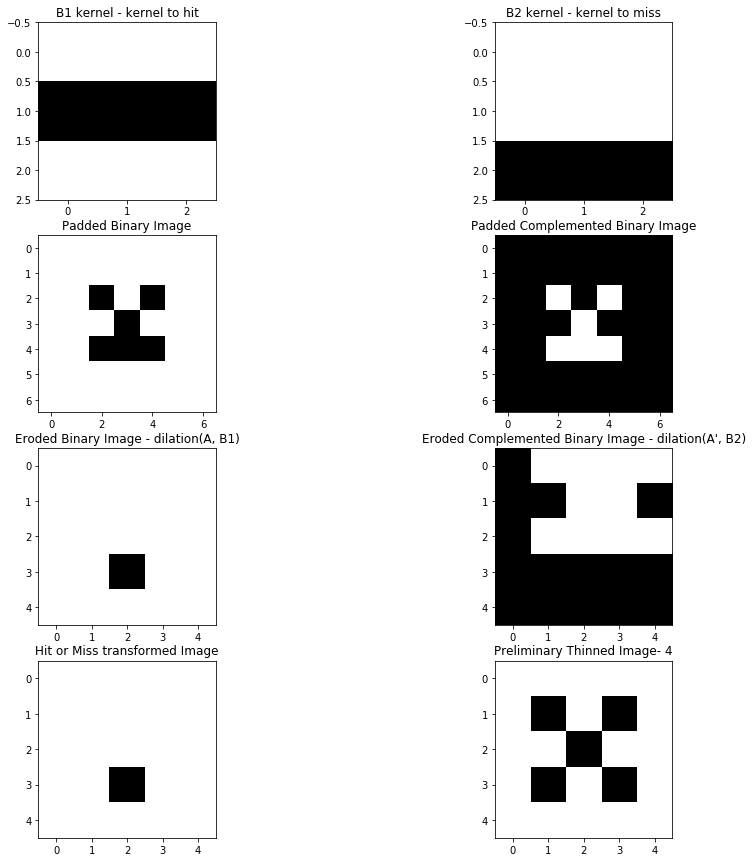

In [6]:
plt.rcParams["figure.figsize"] = (15, 15)
# 3 x 3 B1 kernel initialization - kernel to hit
B1 = np.array([[0, 0, 0],\
               [1, 1, 1],\
               [0, 0, 0]], dtype = np.int32)

# B1 kernel show
plt.subplot(4, 2, 1)
plt.imshow(B1, cmap = "binary")
plt.title("B1 kernel - kernel to hit")



# 3 x 3 B2 kernel initialization - kernel to miss
B2 = np.array([[0, 0, 0],\
               [0, 0, 0],\
               [1, 1, 1]], dtype = np.int32)
# B2 kernel show
plt.subplot(4, 2, 2)
plt.imshow(B2, cmap = "binary")
plt.title("B2 kernel - kernel to miss")



# padded binary image
row, col = binary_image.shape
padded_binary_image = np.zeros((row + 2, col + 2), dtype = np.int32)
padded_binary_image[1 : -1, 1 : -1] = thinned_image[:, :].copy()

# padded original binary image show
plt.subplot(4, 2, 3)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")



# padded complemented binary image
padded_complemented_binary_image = padded_binary_image ^ 1

# padded complemented binary image show
plt.subplot(4, 2, 4)
plt.imshow(padded_complemented_binary_image, cmap = "binary")
plt.title("Padded Complemented Binary Image")



# erosion(binary_image, B1) - morphological image processing
row, col      = binary_image.shape
eroded_binary_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([1, 1, 1])
        tmp_col = np.array([0, 1, 2])
        if np.sum(padded_binary_image[i+tmp_row, j+tmp_col] == B1[tmp_row, tmp_col])\
                  == np.sum(B1):
            eroded_binary_image[i, j] = 1
        else:
            eroded_binary_image[i, j] = 0
            
# eroded binary image show dilation(A, B1)
plt.subplot(4, 2, 5)
plt.imshow(eroded_binary_image, cmap = "binary")
plt.title("Eroded Binary Image - dilation(A, B1)")



# erosion(complemented_binary_image, B2) - morphological image processing
row, col      = binary_image.shape
eroded_complemented_binary_image = complemented_binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([2, 2, 2])
        tmp_col = np.array([0, 1, 1])
        if np.sum(padded_complemented_binary_image[i+tmp_row, j+tmp_col]==B2[tmp_row, tmp_col])\
        == np.sum(B2):
            eroded_complemented_binary_image[i, j] = 1
        else:
            eroded_complemented_binary_image[i, j] = 0
            
# eroded complemented binary image show - dilation(A', B2)
plt.subplot(4, 2, 6)
plt.imshow(eroded_complemented_binary_image, cmap = "binary")
plt.title("Eroded Complemented Binary Image - dilation(A', B2)")



# hit or miss transformation - morphological image processing
# intersection(dilated_binary_image, dilated_complemented_binary_image)
hit_miss_image = (eroded_binary_image & eroded_complemented_binary_image)

# Hit or Miss transformed image show
plt.subplot(4, 2, 7)
plt.imshow(hit_miss_image, cmap = "binary")
plt.title("Hit or Miss transformed Image")



# thinned image
thinned_image = (thinned_image & (hit_miss_image ^ 1))

# thinned image show
plt.subplot(4, 2, 8)
plt.imshow(thinned_image, cmap = "binary")
plt.title("Preliminary Thinned Image- 4")

Text(0.5, 1.0, 'Preliminary Thinned Image- 5')

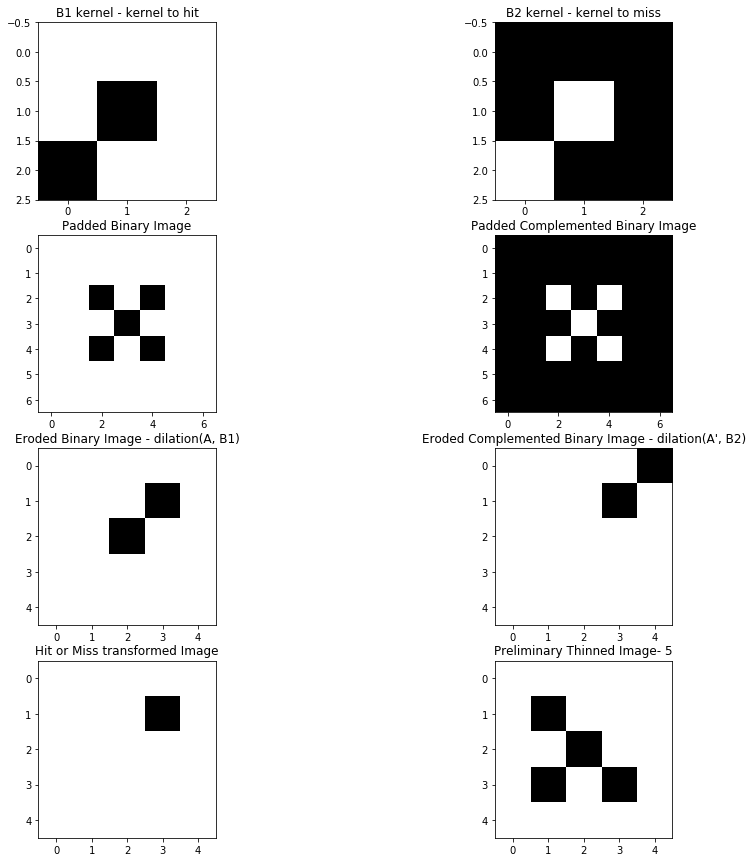

In [7]:
plt.rcParams["figure.figsize"] = (15, 15)
# 3 x 3 B1 kernel initialization - kernel to hit
B1 = np.array([[0, 0, 0],\
               [0, 1, 0],\
               [1, 0, 0]], dtype = np.int32)

# B1 kernel show
plt.subplot(4, 2, 1)
plt.imshow(B1, cmap = "binary")
plt.title("B1 kernel - kernel to hit")



# 3 x 3 B2 kernel initialization - kernel to miss
B2 = np.array([[1, 1, 1],\
               [1, 0, 1],\
               [0, 1, 1]], dtype = np.int32)
# B2 kernel show
plt.subplot(4, 2, 2)
plt.imshow(B2, cmap = "binary")
plt.title("B2 kernel - kernel to miss")



# padded binary image
row, col = binary_image.shape
padded_binary_image = np.zeros((row + 2, col + 2), dtype = np.int32)
padded_binary_image[1 : -1, 1 : -1] = thinned_image[:, :].copy()

# padded original binary image show
plt.subplot(4, 2, 3)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")



# padded complemented binary image
padded_complemented_binary_image = padded_binary_image ^ 1

# padded complemented binary image show
plt.subplot(4, 2, 4)
plt.imshow(padded_complemented_binary_image, cmap = "binary")
plt.title("Padded Complemented Binary Image")



# erosion(binary_image, B1) - morphological image processing
row, col      = binary_image.shape
eroded_binary_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([1, 2])
        tmp_col = np.array([1, 0])
        if np.sum(padded_binary_image[i+tmp_row, j+tmp_col] == B1[tmp_row, tmp_col])\
                  == np.sum(B1):
            eroded_binary_image[i, j] = 1
        else:
            eroded_binary_image[i, j] = 0
            
# eroded binary image show dilation(A, B1)
plt.subplot(4, 2, 5)
plt.imshow(eroded_binary_image, cmap = "binary")
plt.title("Eroded Binary Image - dilation(A, B1)")



# erosion(complemented_binary_image, B2) - morphological image processing
row, col      = binary_image.shape
eroded_complemented_binary_image = complemented_binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 0, 0, 1, 1, 2, 2])
        tmp_col = np.array([0, 1, 2, 0, 2, 1, 2])
        if np.sum(padded_complemented_binary_image[i+tmp_row, j+tmp_col]==B2[tmp_row, tmp_col])\
        == np.sum(B2):
            eroded_complemented_binary_image[i, j] = 1
        else:
            eroded_complemented_binary_image[i, j] = 0
            
# eroded complemented binary image show - dilation(A', B2)
plt.subplot(4, 2, 6)
plt.imshow(eroded_complemented_binary_image, cmap = "binary")
plt.title("Eroded Complemented Binary Image - dilation(A', B2)")



# hit or miss transformation - morphological image processing
# intersection(dilated_binary_image, dilated_complemented_binary_image)
hit_miss_image = (eroded_binary_image & eroded_complemented_binary_image)

# Hit or Miss transformed image show
plt.subplot(4, 2, 7)
plt.imshow(hit_miss_image, cmap = "binary")
plt.title("Hit or Miss transformed Image")



# thinned image
thinned_image = (thinned_image & (hit_miss_image ^ 1))

# thinned image show
plt.subplot(4, 2, 8)
plt.imshow(thinned_image, cmap = "binary")
plt.title("Preliminary Thinned Image- 5")

Text(0.5, 1.0, 'Preliminary Thinned Image- 6')

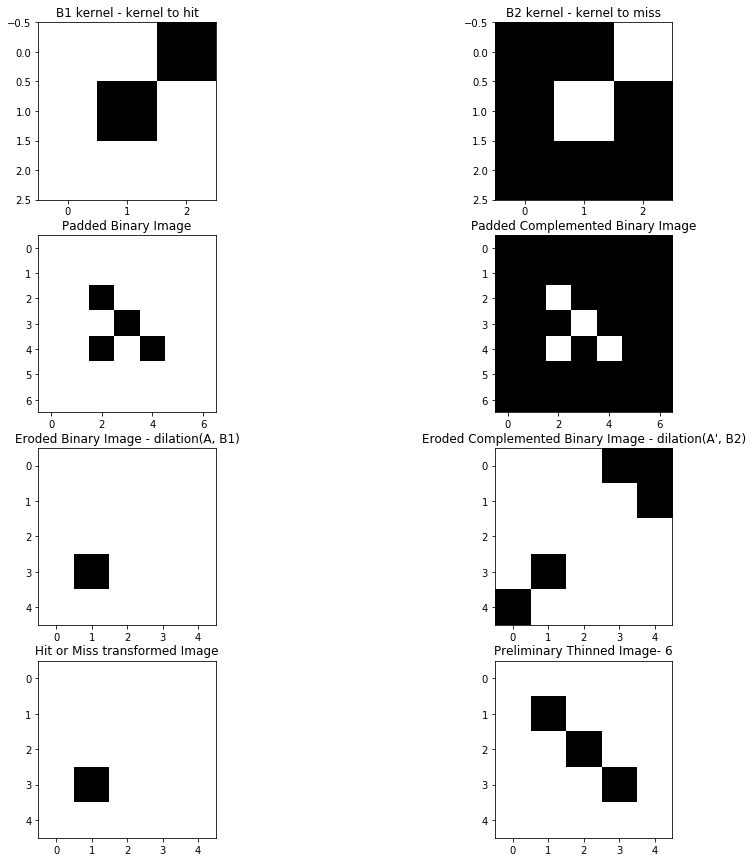

In [8]:
plt.rcParams["figure.figsize"] = (15, 15)
# 3 x 3 B1 kernel initialization - kernel to hit
B1 = np.array([[0, 0, 1],\
               [0, 1, 0],\
               [0, 0, 0]], dtype = np.int32)

# B1 kernel show
plt.subplot(4, 2, 1)
plt.imshow(B1, cmap = "binary")
plt.title("B1 kernel - kernel to hit")



# 3 x 3 B2 kernel initialization - kernel to miss
B2 = np.array([[1, 1, 0],\
               [1, 0, 1],\
               [1, 1, 1]], dtype = np.int32)
# B2 kernel show
plt.subplot(4, 2, 2)
plt.imshow(B2, cmap = "binary")
plt.title("B2 kernel - kernel to miss")



# padded binary image
row, col = binary_image.shape
padded_binary_image = np.zeros((row + 2, col + 2), dtype = np.int32)
padded_binary_image[1 : -1, 1 : -1] = thinned_image[:, :].copy()

# padded original binary image show
plt.subplot(4, 2, 3)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")



# padded complemented binary image
padded_complemented_binary_image = padded_binary_image ^ 1

# padded complemented binary image show
plt.subplot(4, 2, 4)
plt.imshow(padded_complemented_binary_image, cmap = "binary")
plt.title("Padded Complemented Binary Image")



# erosion(binary_image, B1) - morphological image processing
row, col      = binary_image.shape
eroded_binary_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 1])
        tmp_col = np.array([2, 1])
        if np.sum(padded_binary_image[i+tmp_row, j+tmp_col] == B1[tmp_row, tmp_col])\
                  == np.sum(B1):
            eroded_binary_image[i, j] = 1
        else:
            eroded_binary_image[i, j] = 0
            
# eroded binary image show dilation(A, B1)
plt.subplot(4, 2, 5)
plt.imshow(eroded_binary_image, cmap = "binary")
plt.title("Eroded Binary Image - dilation(A, B1)")



# erosion(complemented_binary_image, B2) - morphological image processing
row, col      = binary_image.shape
eroded_complemented_binary_image = complemented_binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 0, 1, 1, 2, 2, 2])
        tmp_col = np.array([0, 1, 0, 2, 0, 1, 2])
        if np.sum(padded_complemented_binary_image[i+tmp_row, j+tmp_col]==B2[tmp_row, tmp_col])\
        == np.sum(B2):
            eroded_complemented_binary_image[i, j] = 1
        else:
            eroded_complemented_binary_image[i, j] = 0
            
# eroded complemented binary image show - dilation(A', B2)
plt.subplot(4, 2, 6)
plt.imshow(eroded_complemented_binary_image, cmap = "binary")
plt.title("Eroded Complemented Binary Image - dilation(A', B2)")



# hit or miss transformation - morphological image processing
# intersection(dilated_binary_image, dilated_complemented_binary_image)
hit_miss_image = (eroded_binary_image & eroded_complemented_binary_image)

# Hit or Miss transformed image show
plt.subplot(4, 2, 7)
plt.imshow(hit_miss_image, cmap = "binary")
plt.title("Hit or Miss transformed Image")



# thinned image
thinned_image = (thinned_image & (hit_miss_image ^ 1))

# thinned image show
plt.subplot(4, 2, 8)
plt.imshow(thinned_image, cmap = "binary")
plt.title("Preliminary Thinned Image- 6")

Text(0.5, 1.0, 'Preliminary Thinned Image- 7')

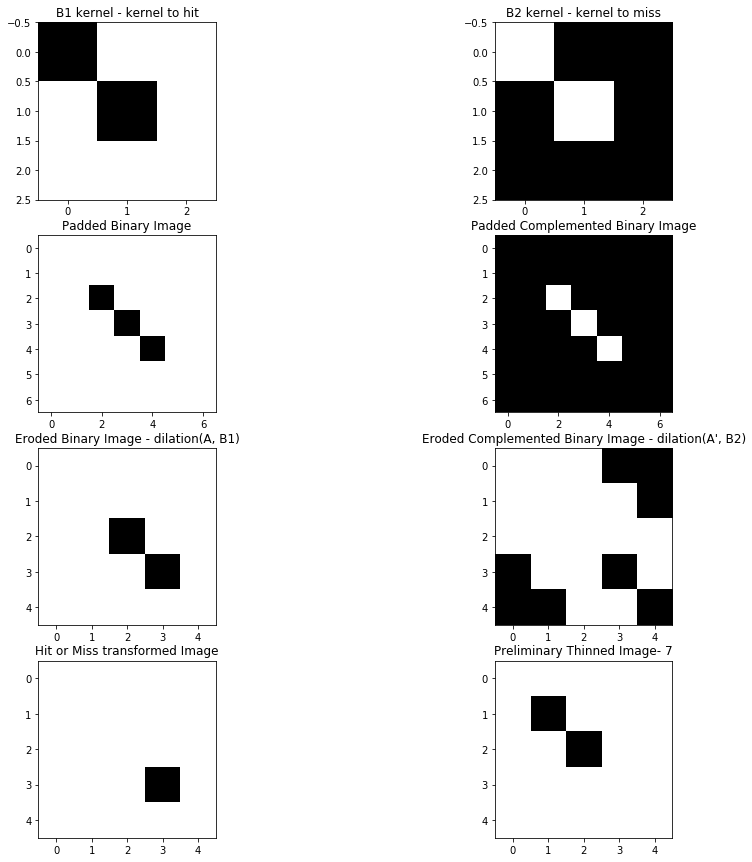

In [9]:
plt.rcParams["figure.figsize"] = (15, 15)
# 3 x 3 B1 kernel initialization - kernel to hit
B1 = np.array([[1, 0, 0],\
               [0, 1, 0],\
               [0, 0, 0]], dtype = np.int32)

# B1 kernel show
plt.subplot(4, 2, 1)
plt.imshow(B1, cmap = "binary")
plt.title("B1 kernel - kernel to hit")



# 3 x 3 B2 kernel initialization - kernel to miss
B2 = np.array([[0, 1, 1],\
               [1, 0, 1],\
               [1, 1, 1]], dtype = np.int32)
# B2 kernel show
plt.subplot(4, 2, 2)
plt.imshow(B2, cmap = "binary")
plt.title("B2 kernel - kernel to miss")



# padded binary image
row, col = binary_image.shape
padded_binary_image = np.zeros((row + 2, col + 2), dtype = np.int32)
padded_binary_image[1 : -1, 1 : -1] = thinned_image[:, :].copy()

# padded original binary image show
plt.subplot(4, 2, 3)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")



# padded complemented binary image
padded_complemented_binary_image = padded_binary_image ^ 1

# padded complemented binary image show
plt.subplot(4, 2, 4)
plt.imshow(padded_complemented_binary_image, cmap = "binary")
plt.title("Padded Complemented Binary Image")



# erosion(binary_image, B1) - morphological image processing
row, col      = binary_image.shape
eroded_binary_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 1])
        tmp_col = np.array([0, 1])
        if np.sum(padded_binary_image[i+tmp_row, j+tmp_col] == B1[tmp_row, tmp_col])\
                  == np.sum(B1):
            eroded_binary_image[i, j] = 1
        else:
            eroded_binary_image[i, j] = 0
            
# eroded binary image show dilation(A, B1)
plt.subplot(4, 2, 5)
plt.imshow(eroded_binary_image, cmap = "binary")
plt.title("Eroded Binary Image - dilation(A, B1)")



# erosion(complemented_binary_image, B2) - morphological image processing
row, col      = binary_image.shape
eroded_complemented_binary_image = complemented_binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 0, 1, 1, 2, 2, 2])
        tmp_col = np.array([1, 2, 0, 2, 0, 1, 2])
        if np.sum(padded_complemented_binary_image[i+tmp_row, j+tmp_col]==B2[tmp_row, tmp_col])\
        == np.sum(B2):
            eroded_complemented_binary_image[i, j] = 1
        else:
            eroded_complemented_binary_image[i, j] = 0
            
# eroded complemented binary image show - dilation(A', B2)
plt.subplot(4, 2, 6)
plt.imshow(eroded_complemented_binary_image, cmap = "binary")
plt.title("Eroded Complemented Binary Image - dilation(A', B2)")



# hit or miss transformation - morphological image processing
# intersection(dilated_binary_image, dilated_complemented_binary_image)
hit_miss_image = (eroded_binary_image & eroded_complemented_binary_image)

# Hit or Miss transformed image show
plt.subplot(4, 2, 7)
plt.imshow(hit_miss_image, cmap = "binary")
plt.title("Hit or Miss transformed Image")



# thinned image
thinned_image = (thinned_image & (hit_miss_image ^ 1))

# thinned image show
plt.subplot(4, 2, 8)
plt.imshow(thinned_image, cmap = "binary")
plt.title("Preliminary Thinned Image- 7")

Text(0.5, 1.0, 'Preliminary Thinned Image- 8')

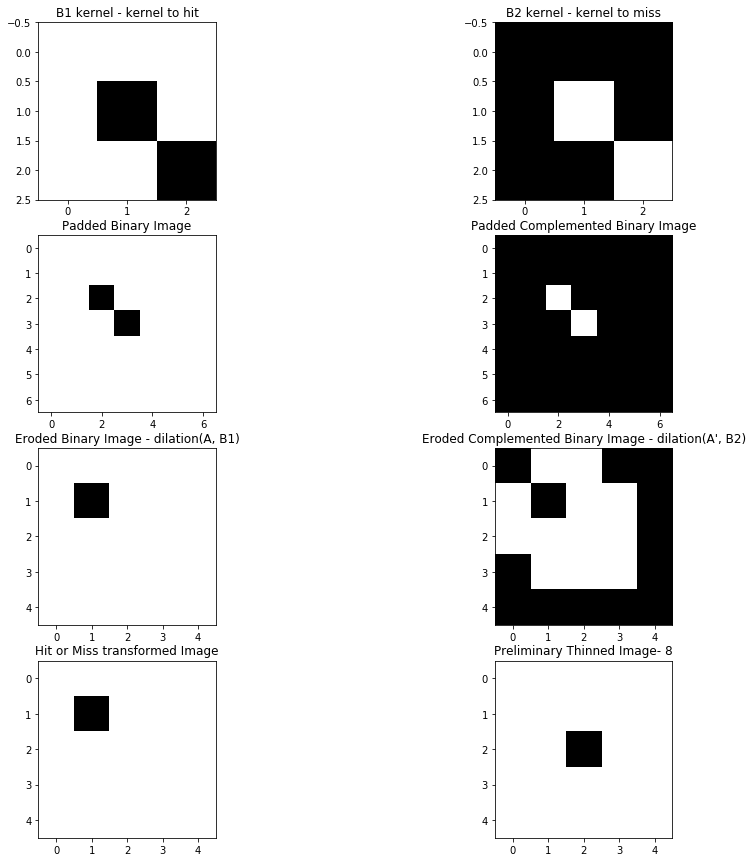

In [10]:
plt.rcParams["figure.figsize"] = (15, 15)
# 3 x 3 B1 kernel initialization - kernel to hit
B1 = np.array([[0, 0, 0],\
               [0, 1, 0],\
               [0, 0, 1]], dtype = np.int32)

# B1 kernel show
plt.subplot(4, 2, 1)
plt.imshow(B1, cmap = "binary")
plt.title("B1 kernel - kernel to hit")



# 3 x 3 B2 kernel initialization - kernel to miss
B2 = np.array([[1, 1, 1],\
               [1, 0, 1],\
               [1, 1, 0]], dtype = np.int32)
# B2 kernel show
plt.subplot(4, 2, 2)
plt.imshow(B2, cmap = "binary")
plt.title("B2 kernel - kernel to miss")



# padded binary image
row, col = binary_image.shape
padded_binary_image = np.zeros((row + 2, col + 2), dtype = np.int32)
padded_binary_image[1 : -1, 1 : -1] = thinned_image[:, :].copy()

# padded original binary image show
plt.subplot(4, 2, 3)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")



# padded complemented binary image
padded_complemented_binary_image = padded_binary_image ^ 1

# padded complemented binary image show
plt.subplot(4, 2, 4)
plt.imshow(padded_complemented_binary_image, cmap = "binary")
plt.title("Padded Complemented Binary Image")



# erosion(binary_image, B1) - morphological image processing
row, col      = binary_image.shape
eroded_binary_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([1, 2])
        tmp_col = np.array([1, 2])
        if np.sum(padded_binary_image[i+tmp_row, j+tmp_col] == B1[tmp_row, tmp_col])\
                  == np.sum(B1):
            eroded_binary_image[i, j] = 1
        else:
            eroded_binary_image[i, j] = 0
            
# eroded binary image show dilation(A, B1)
plt.subplot(4, 2, 5)
plt.imshow(eroded_binary_image, cmap = "binary")
plt.title("Eroded Binary Image - dilation(A, B1)")



# erosion(complemented_binary_image, B2) - morphological image processing
row, col      = binary_image.shape
eroded_complemented_binary_image = complemented_binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_row = np.array([0, 0, 0, 1, 1, 2, 2])
        tmp_col = np.array([0, 1, 2, 0, 2, 0, 1])
        if np.sum(padded_complemented_binary_image[i+tmp_row, j+tmp_col]==B2[tmp_row, tmp_col])\
        == np.sum(B2):
            eroded_complemented_binary_image[i, j] = 1
        else:
            eroded_complemented_binary_image[i, j] = 0
            
# eroded complemented binary image show - dilation(A', B2)
plt.subplot(4, 2, 6)
plt.imshow(eroded_complemented_binary_image, cmap = "binary")
plt.title("Eroded Complemented Binary Image - dilation(A', B2)")



# hit or miss transformation - morphological image processing
# intersection(dilated_binary_image, dilated_complemented_binary_image)
hit_miss_image = (eroded_binary_image & eroded_complemented_binary_image)

# Hit or Miss transformed image show
plt.subplot(4, 2, 7)
plt.imshow(hit_miss_image, cmap = "binary")
plt.title("Hit or Miss transformed Image")



# thinned image
thinned_image = (thinned_image & (hit_miss_image ^ 1))

# thinned image show
plt.subplot(4, 2, 8)
plt.imshow(thinned_image, cmap = "binary")
plt.title("Preliminary Thinned Image- 8")

Text(0.5, 1.0, 'Thinned Image')

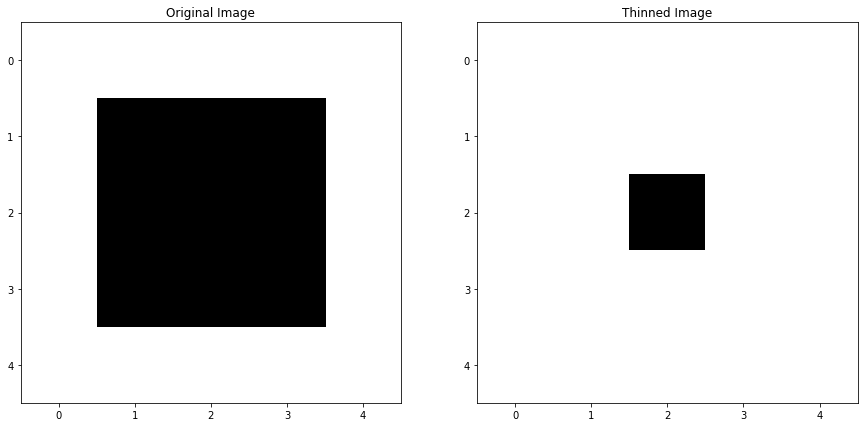

In [11]:
# Original Image and Thinned Image show
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap = "binary")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(thinned_image, cmap = "binary")
plt.title("Thinned Image")